# <p style="text-align: center;"> Sailfort Motors: Predicting Employee Churn With 4 models: Logistic Regression, Decision Tree, Random Forest, and XGBoost <p>

#### <p style="text-align: center;"> This project highlights the importance of interpreting model results. The best model did not have the highest metric scores. <p>

### Project Purpose: Build a model to accurately predict employees who will leave, identify variables that most contribute to employee departure, and make recommendations to stakeholders to reduce employee departure.

### Data Overview

Data Source: [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## 1. Imports, Overview, Consider Variables

### Import packages

In [110]:
#Standard Data Analysis Libraries
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
#Statistics & Regression Libraries
from scipy import stats
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
#Decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
#XGBoost
from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

In [111]:
# Load dataset
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


**Potential Data manipulation / feature engineering**

satisfaction_level - quartiles: low 0-24, mid_low 25-49, mid_high 50-74, high 75-100

last_evaluation - quartiles same as satisfaction

number_of_projects - get range, get value counts, consider bins

average_monthly_hours - get range, get percentiles, consider bins

time_spend_company - get range, get percentiles, consider bins

Work_accident - lower case

Department - lower case, get dummies

salary - get dummies

## 2. Data Exploration

In [112]:
df0.shape

(14999, 10)

In [113]:
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [114]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


object type variables: Department and salary not included in descriptive stats. 

Copy the dataframe to manipulate it while keeping the original df0 in tact.

In [115]:
df_copy = df0.copy()

Standardize column names

In [116]:
df_copy.columns = df_copy.columns.str.lower()
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Convert object dtpyes to string to show value counts and use in machine learning models

In [117]:
cols_to_str = ['department', 'salary']
for col in cols_to_str:
    df_copy[col] = df_copy[col].astype('str')
df_copy.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Display value counts for string columns

In [118]:
df_copy['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [119]:
df_copy['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [120]:
df_copy['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [121]:
#check for balance in the predictor variable
df_copy['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

This balance isn't ideal, but it's not prohibivebly bad for creating models. More data could be very helpful, and I'll include this in my conclusion.

#### Check for missing values

In [122]:
df_copy.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### Check for duplicates

In [123]:
df_copy.duplicated().sum()

3008

In [124]:
#show duplicates only to investigate
df_copy[df_copy.duplicated()].head(30)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [125]:
#It's extremely unlikely that an employee entered the exact same data for all columns. I'll let the team know about the duplicates and that they were dropped.
#drop dupes and save as new DataFrame
df1 = df_copy.drop_duplicates(keep = 'first')
df1.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [126]:
#check shape after dropping dupes to be sure the count is correct.
print(df1.shape)
print(14999 - 3008)

(11991, 10)
11991


In [127]:
#correct the misspelling of monthly hours column
df1 = df1.rename(columns = {'average_montly_hours': 'average_monthly_hours'})
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check for outliers

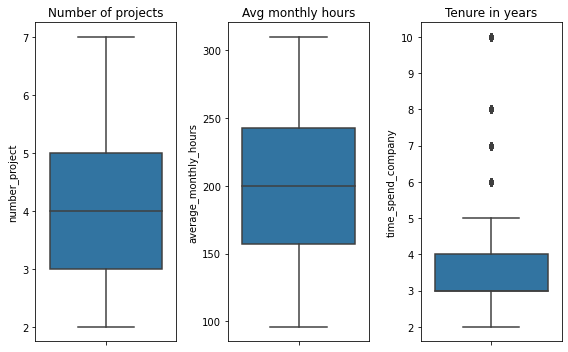

In [128]:
#3 figure boxplots. Columns to check : number_project, average_montly_hours, time_spend_company
fig, axes = plt.subplots(1, 3, figsize = (8,5))
sns.boxplot(y = df1['number_project'], ax = axes[0])
axes[0].set_title('Number of projects')
sns.boxplot(y = df1['average_monthly_hours'], ax = axes[1])
axes[1].set_title('Avg monthly hours')
sns.boxplot(y = df1['time_spend_company'], ax = axes[2])
axes[2].set_title('Tenure in years')

plt.tight_layout()
plt.show()

In [129]:
df_tenure_outliers = df1[(df1['time_spend_company'] >= 6)]
df_tenure_outliers.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.598677,0.727269,4.030340,204.932039,6.830097,0.179612,0.132282,0.050971
std,0.264996,0.177934,1.126421,50.728714,1.377750,0.384097,0.339002,0.220072
min,0.120000,0.360000,2.000000,97.000000,6.000000,0.000000,0.000000,0.000000
25%,0.377500,0.580000,3.000000,163.000000,6.000000,0.000000,0.000000,0.000000
50%,0.640000,0.745000,4.000000,214.000000,6.000000,0.000000,0.000000,0.000000
75%,0.820000,0.880000,5.000000,248.000000,7.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,293.000000,10.000000,1.000000,1.000000,1.000000


In [130]:
print('Percentage of data tenure outliers: ', (824/11991*100),'%')

Percentage of data tenure outliers:  6.8718205320657155 %


The outliers will stay in for now. Certain machine learning models are not as impacted by outliers. A logistic regression model is more sensitive.

## 3. EDA

In [131]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


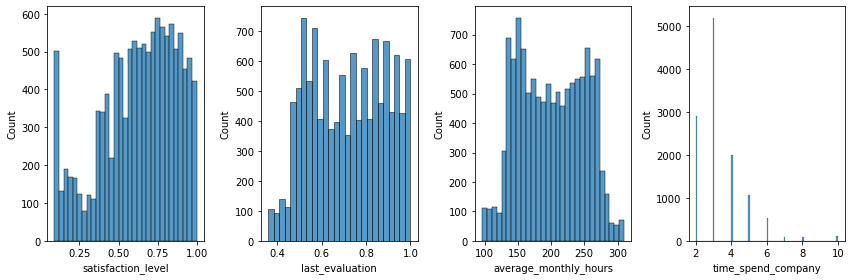

In [132]:
#4 figure histogram plots of satisfaction, last evaluation, avg monthly hours, tenure
fig, axes = plt.subplots(1, 4, figsize = (12,4))
sns.histplot(df1['satisfaction_level'], ax = axes[0])

sns.histplot(df1['last_evaluation'], ax = axes[1])

sns.histplot(df1['average_monthly_hours'], ax = axes[2])

sns.histplot(df1['time_spend_company'], ax = axes[3])

plt.tight_layout()
plt.show()

#### Monthly Hours and Number of Projects

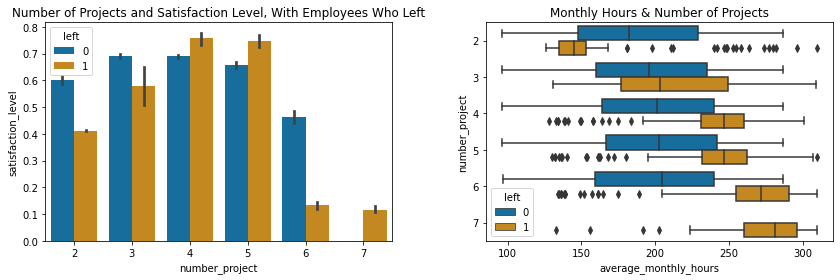

In [133]:
#2 figure plot
fig, axes = plt.subplots(1, 2, figsize = (12,4))
#barplot number of projects vs satisfaction level, showling employees who left or stayed
sns.barplot(x = df1['number_project'], y = df1['satisfaction_level'], hue = df1['left'], ax = axes[0], palette = 'colorblind')
axes[0].set_title('Number of Projects and Satisfaction Level, With Employees Who Left')
#box plot number of projects vs average monthly hours showing employees who left or stayed
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = axes[1], palette = 'colorblind')
axes[1].set_title('Monthly Hours & Number of Projects')

fig.tight_layout()
fig.show()

The projects by satisfaction level chart does not give us much information other than employees who worked on 7 projects always left the company, and employees have a lower satisfaction level at 2 projects, and 6 or more projects.

For the Monthly Hours vs Number of Projects chart, there seems to be a trend among employees who left.

Employees who left worked on 2 projects and had low monthly hours
Employees who left worked on 4 or more projects and had high monthly hours.

Text(0.5, 1.0, 'Histogram of Number of Projects')

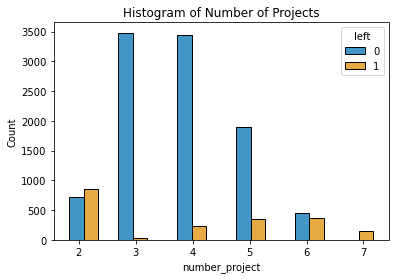

In [134]:
#Histogram number of projects showing employees who left or stayed
fig = sns.histplot(data = df1, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 3, palette = 'colorblind')
fig.set_title('Histogram of Number of Projects')

Employees who worked on 2 projects, or 6 or 7 projects are very likely to leave. We can see from the monthly hours vs number of projects box plot that monthly hours and number of projects may be positively correlated.

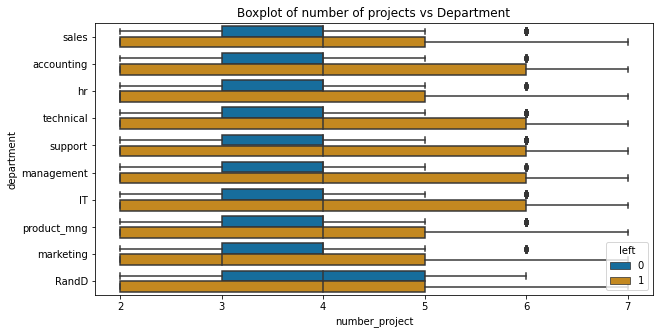

In [135]:
#Boxplot of number of projects by department, showing employees who left and stayed.
plt.figure(figsize= (10, 5))

sns.boxplot(data = df1, x = 'number_project', y = 'department', hue = 'left', palette = 'colorblind')
plt.title('Boxplot of number of projects vs Department')
plt.legend(loc = 'lower right', title = 'left')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

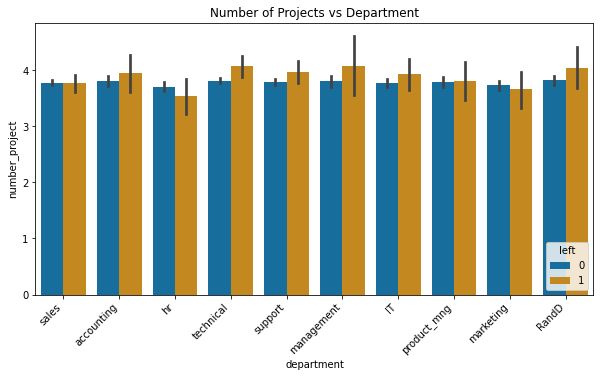

In [136]:
plt.figure(figsize = (10,5))

sns.barplot(data = df1, y = 'number_project', x = 'department', hue = 'left', palette = 'colorblind')
plt.title('Number of Projects vs Department')
plt.legend(loc = 'lower right', title = 'left')
plt.xticks(rotation = 45, horizontalalignment = 'right')

These plots show less variation in the number of projects for employees who stayed. The black line at the top of each bar is the 'error bar', which shows variation in the mean of that group of data. In the boxplot, the quartiles and upper limits show this variation more clearly.

For 6/10 departments, employees who left had a higher mean number of projects than employees who stayed.

There is no clear distinction of the mean number of projects between departments.

Text(0.5, 1.0, 'Scatter plot / Heatmap of Satisfaction vs Average Monthly Hours')

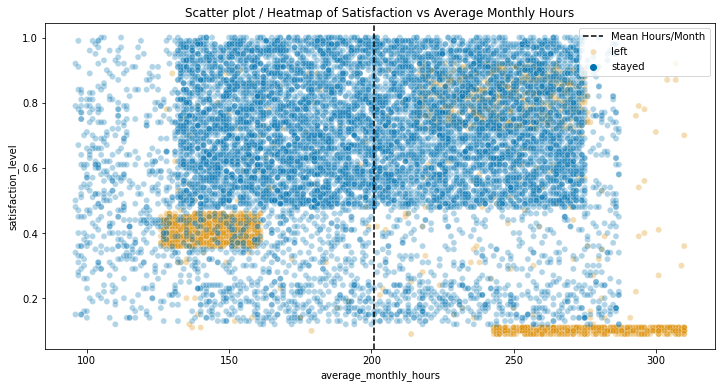

In [137]:
#scatter plot satisfaction level vs avg monthly hours showing employees who left or stayed
plt.figure(figsize = (12,6))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.3, palette = 'colorblind')
#plot a dashed line at the mean hours/month found in the above describe method
plt.axvline(x = 201.05, color = 'black', ls = '--', label = 'Mean hours/month')
plt.legend(labels = ['Mean Hours/Month', 'left', 'stayed'])
plt.title('Scatter plot / Heatmap of Satisfaction vs Average Monthly Hours')

There are 4 key blocks of data in this scatter plot.

* 1. The block of employees who stayed are between ~130-275 hours and above 0.5 satisfaction level.
* 2. A block of employees who left are between ~125-160 hours per month and a ~0.35 - 0.45 satisfaction level.
* 3. A block of employees who left are between ~240-320 hours per month and a 0.1 satisfaction level.
* 4. A small block of employees who left are between ~210-275 hours and a high 0.7 - 0.9 satisfaction level.

Text(0.5, 1.0, 'Scatter plot / Heatmap of Last Evaluation vs Average Monthly Hours')

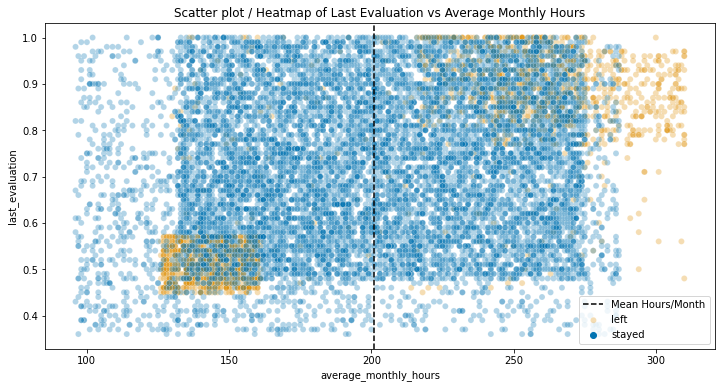

In [138]:
#scatter plot last evaluation vs avg monthly hours showing employees who left or stayed.
plt.figure(figsize = (12,6))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.3, palette = 'colorblind')
#plot a dashed line at average number of hours/month found above in .describe
plt.axvline(x = 201.05, color = 'black', ls = '--', label = 'Mean hours/month')
plt.legend(labels = ['Mean Hours/Month', 'left', 'stayed'])
plt.title('Scatter plot / Heatmap of Last Evaluation vs Average Monthly Hours')

There are 3 key blocks in this scatter plot.

* 1. The block of eployees who stayed are between ~130 - 275 hours per month, and an evaluation of about 0.48 - 1.
* 2. A block of emplyees who left between ~125 - 160 hours per month and an evaluation of ~ 0.45 - 0.58.
* 3. A block of employees who left between ~225 - 325 hours per month and an evaluation of 0.8 - 1.

#### Bin data for analysis?

* satisfaction_level
* last_evaluation
* average_monthly_hours
* time_spend_company


#### Tenure (time_spend_company)

Text(0.5, 1.0, 'Tenure histogram')

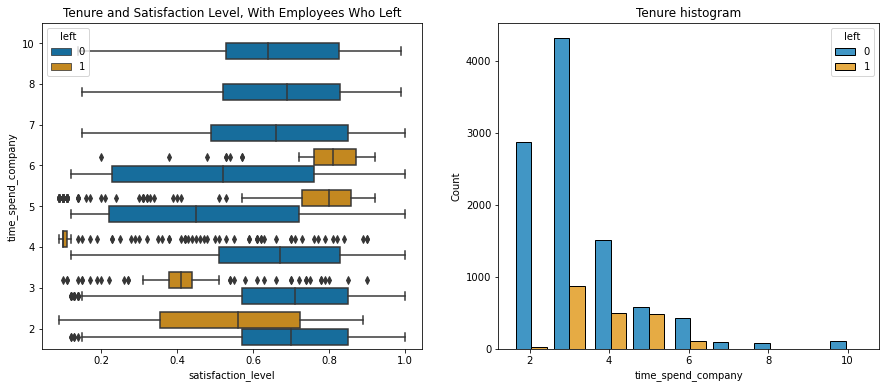

In [139]:
#2 figure plot
fig, axes = plt.subplots(1, 2, figsize = (15,6))
#boxplot tenure vs satisfaction showing employees who left or stayed
sns.boxplot(data = df1, y = 'time_spend_company', x = 'satisfaction_level', hue = df1['left'], orient = 'h', ax = axes[0], palette = 'colorblind')
axes[0].set_title('Tenure and Satisfaction Level, With Employees Who Left')
axes[0].invert_yaxis()
axes[0].legend(loc = 'upper left', title = 'left')
#histogram of tenure showing employees who left or stayed.
sns.histplot(data = df1, x = 'time_spend_company', hue = 'left', multiple = 'dodge', shrink = 9, ax = axes[1], palette = 'colorblind')
axes[1].set_title('Tenure histogram')

#### Salary

Text(0.5, 1.0, 'Tenure histogram')

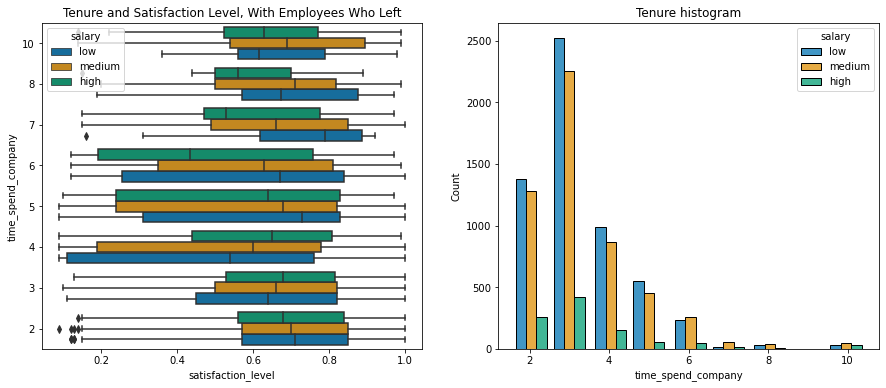

In [140]:
#2 figure plot
fig, axes = plt.subplots(1, 2, figsize = (15,6))
#Box plot of tenure vs satisfaction level, showing salary levels.
sns.boxplot(data = df1, y = 'time_spend_company', x = 'satisfaction_level', orient = 'h', hue = 'salary', ax = axes[0], palette = 'colorblind')
axes[0].set_title('Tenure and Satisfaction Level, With Employees Who Left')
axes[0].invert_yaxis()
axes[0].legend(loc = 'upper left', title = 'salary')
#Histogram of tenure, showing salary levels.
sns.histplot(data = df1, x = 'time_spend_company', hue = 'salary', multiple = 'dodge', shrink = 9, ax = axes[1], palette = 'colorblind')
axes[1].set_title('Tenure histogram')

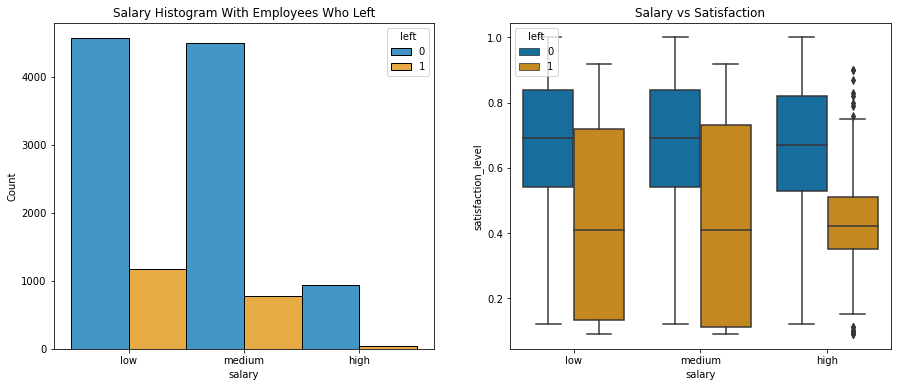

In [141]:
#2 figure plot
fig, axes = plt.subplots(1, 2, figsize = (15,6))
#Histogram of salary, showing employees who left and stayed.
sns.histplot(data = df1, x = df1['salary'], hue = 'left', 
             multiple = 'dodge', ax = axes[0], palette = 'colorblind')
axes[0].set_title('Salary Histogram With Employees Who Left')
#Box plot of satisfaction level vs salary, showing employees who left and stayed.
sns.boxplot(data = df1, 
            y = 'satisfaction_level',
            x = 'salary',
            hue = 'left', 
            ax = axes[1], palette = 'colorblind')
            

axes[1].set_title('Salary vs Satisfaction')
axes[1].legend(loc = 'upper left', title = 'left')

High salary has a very low proportion of employees who left. Satisfaction level seems to be a strong predictor variable for employees who left.

#### Monthly Hour Groups

In [142]:
#For loop to create monthly hour groups for visualizations
result = []
for i in df1['average_monthly_hours']:
    if i < 125:
        result.append('Less Than 125'),
    elif 125 <= i < 175:
        result.append('125 to 174'),
    elif 175 <= i < 225:
        result.append('175 to 224'),
    elif 225 <= i < 275:
        result.append('225 to 274'),
    else:
        result.append('Greater than 275')
df1['monthly_hour_group'] = result
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,monthly_hour_group
0,0.38,0.53,2,157,3,0,1,0,sales,low,125 to 174
1,0.80,0.86,5,262,6,0,1,0,sales,medium,225 to 274
2,0.11,0.88,7,272,4,0,1,0,sales,medium,225 to 274
3,0.72,0.87,5,223,5,0,1,0,sales,low,175 to 224
4,0.37,0.52,2,159,3,0,1,0,sales,low,125 to 174


In [143]:
#Create monthly hour group order to use in plots
mh_group_order = ['Less Than 125', '125 to 174', '175 to 224', '225 to 274', 'Greater than 275']

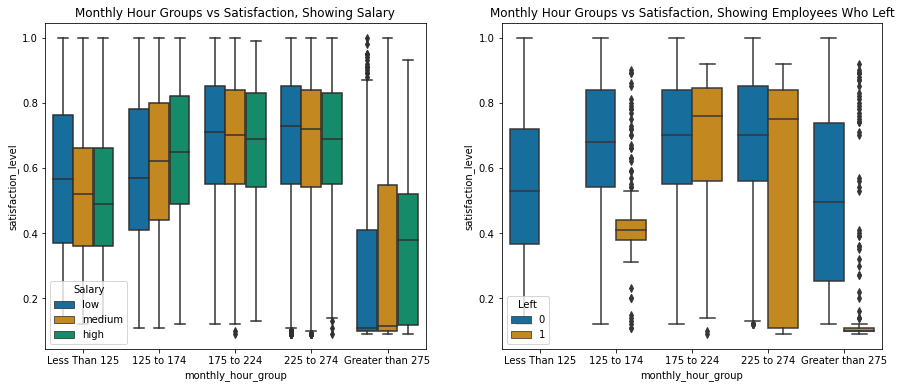

In [144]:
#2 figure plot
fig, axes = plt.subplots(1, 2, figsize = (15,6))
#Box plot of satisfaction level vs monthly hour groups showing salary.
sns.boxplot(data = df1, x = 'monthly_hour_group', y = 'satisfaction_level', hue = 'salary', order = mh_group_order, ax = axes[0], palette = 'colorblind')
axes[0].set_title('Monthly Hour Groups vs Satisfaction, Showing Salary')
axes[0].legend(loc = 'lower left', title = 'Salary')
#Box plot of satisfaction level vs salary, showing employees who left and stayed.
sns.boxplot(data = df1, x = 'monthly_hour_group', y = 'satisfaction_level', hue = 'left', order = mh_group_order, ax = axes[1], palette = 'colorblind')
axes[1].set_title('Monthly Hour Groups vs Satisfaction, Showing Employees Who Left')
axes[1].legend(loc = 'lower left', title = 'Left')

The drop in satisfaction over 275 hours per month for all salaries is very telling. High salaries in this group have a much higher Q50 satisfaction score. 

The group of employees who left at 125-175 hours/month with such a low satisfaction level is interesting. This is 30-40 hours per week, so they aren't overworked. The stakeholders will want to know about this group.

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

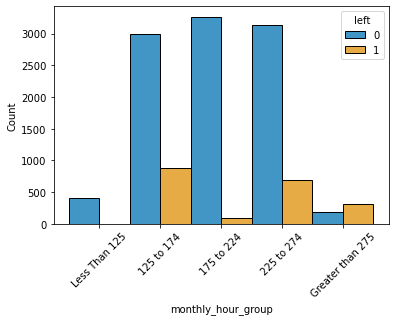

In [145]:
#Order the monthly_hour_group column to appear organized in the plot.
df1['monthly_hour_group'] = pd.Categorical(df1['monthly_hour_group'], ['Less Than 125', '125 to 174', '175 to 224', '225 to 274', 'Greater than 275'])
#Histogram of monthly hour groups, showing employees who left and stayed.
g = sns.histplot(data = df1, 
             x = 'monthly_hour_group', 
             hue = 'left', 
             multiple = 'dodge',
             palette = 'colorblind')
#align x tick labels
plt.xticks(rotation = 45)

The most stable group is 175-224 hours per month, and less than 125 hours per month. Churn is higher than retention for employees with over 275 hours per month.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

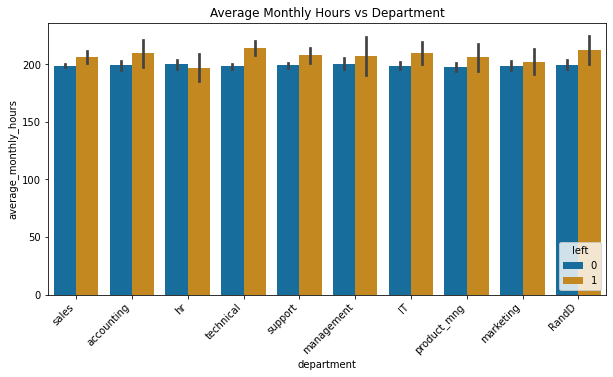

In [146]:
plt.figure(figsize = (10,5))

sns.barplot(data = df1, y = 'average_monthly_hours', x = 'department', hue = 'left', palette = 'colorblind')
plt.title('Average Monthly Hours vs Department')
plt.legend(loc = 'lower right', title = 'left')
plt.xticks(rotation = 45, horizontalalignment = 'right')

For 9/10 deparments, employees who left have higher mean average monthly hours.

The variation in mean average monthly hours is greater among employees who left. This could simply be due to the balance of the 'left' variable. There are fewer employees who left than stayed, so the variation could be due to the fact that there is less data.

#### Promotion Last 5 Years

Text(0.5, 1.0, 'Monthly Hours by promotion')

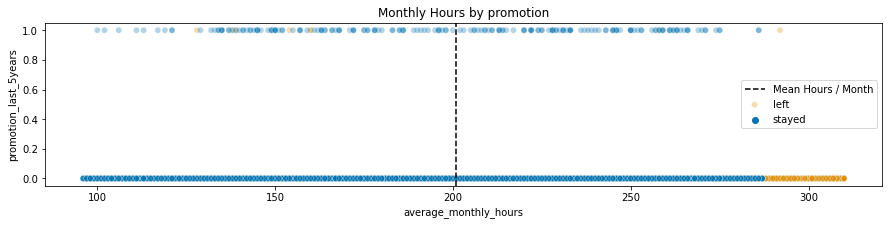

In [34]:
#Promotion Last 5 Years vs Average Monthly Hours scatter plot showing employees who left and stayed.
plt.figure(figsize = (15,3))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', palette = 'colorblind', alpha = 0.3)
#add a dashed line for mean hours per month from the descriptive statistics.
plt.axvline(x = 201, color = 'black', ls = '--')
plt.legend(labels = ['Mean Hours / Month', 'left', 'stayed'])
plt.title('Monthly Hours by promotion')

There are 2 key insights from this scatter plot

* 1. employees who were promoted were more likely to stay
* 2. employees who worked more than ~280 hours per month were very likely to leave

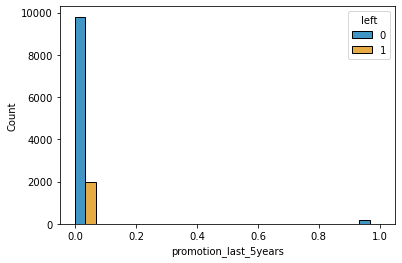

In [35]:
#Promotion Last 5 Years histogram showing employees who left and stayed.
sns.histplot(data = df1, x = 'promotion_last_5years', hue = 'left', multiple = 'dodge', palette = 'colorblind')

There are not very many employees promoted, and the number of those who left is too small to register on the plot.

In [36]:
#Check columns again to investigate more variables
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,monthly_hour_group
0,0.38,0.53,2,157,3,0,1,0,sales,low,125 to 174
1,0.80,0.86,5,262,6,0,1,0,sales,medium,225 to 274
2,0.11,0.88,7,272,4,0,1,0,sales,medium,225 to 274
3,0.72,0.87,5,223,5,0,1,0,sales,low,175 to 224
4,0.37,0.52,2,159,3,0,1,0,sales,low,125 to 174


#### Department

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

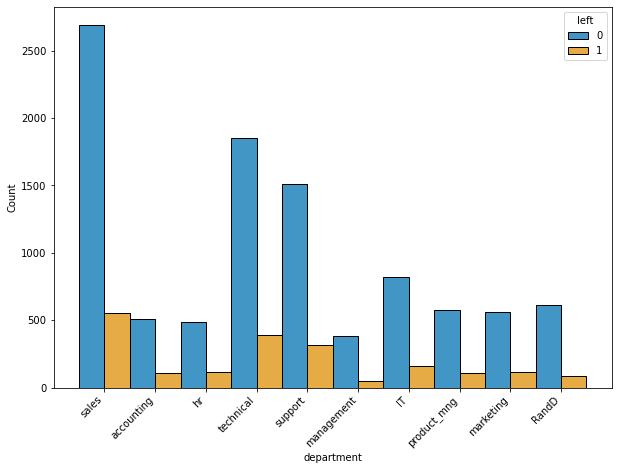

In [37]:
#Department histogram showing employees who left and stayed.
plt.figure(figsize = (10,7))
sns.histplot(data = df1, x = 'department', hue = 'left', multiple = 'dodge', palette = 'colorblind')
plt.xticks(rotation = 45, horizontalalignment = 'right')

There may not be a clear distinction of churn rate between different departments. The proportions seem similar for all departments.

#### Work Accident

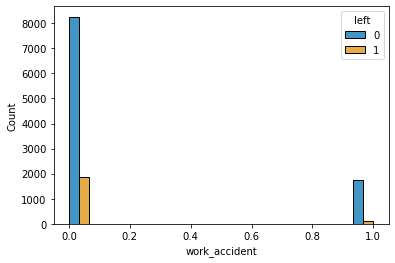

In [38]:
#Histogram of Work Accidents, showing employees who left and stayed.
sns.histplot(data = df1, x = 'work_accident', hue = 'left', multiple = 'dodge', palette = 'colorblind')

The occurance of a work accident does not look like a strong predictor of churn.

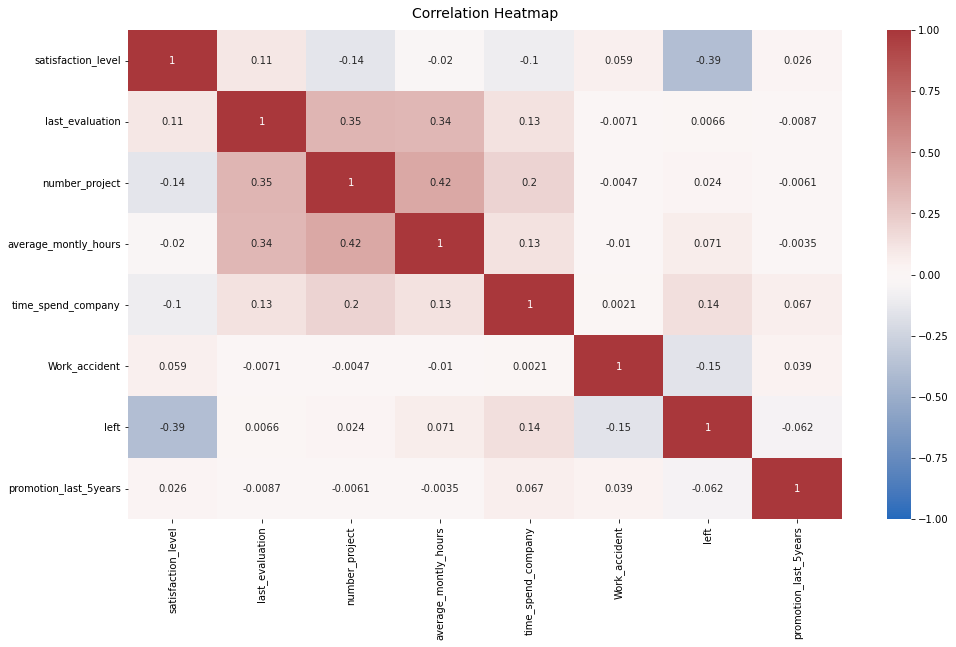

In [39]:
#Correlation Heat Map from the original DataFrame
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Left is most negatively associated with satisfaction level.
Number of projects and tenure are slightly negatively correlated with satisfaction level.
Work accident is negatively correlated with Left.

number of projects and average monthly hours are positively correlated with each other.
Also average monthly hours and number of projects are positively correlated with last evaluation.

## 4. Build Models

* The purpose is to accurately predict whether an employee will leave the company. 'left' is the variable to predict.

### Modeling: Logistic Regression

In [40]:
#Check columns again before building a model.
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,monthly_hour_group
0,0.38,0.53,2,157,3,0,1,0,sales,low,125 to 174
1,0.80,0.86,5,262,6,0,1,0,sales,medium,225 to 274
2,0.11,0.88,7,272,4,0,1,0,sales,medium,225 to 274
3,0.72,0.87,5,223,5,0,1,0,sales,low,175 to 224
4,0.37,0.52,2,159,3,0,1,0,sales,low,125 to 174


outliers from time_spend need to be dropped

In [41]:
#Prepare to drop outliers from 'time_spend_company' using lower and upper limit of interquartile range.
# Compute the 25th percentile value in `time_spend_company`
percentile25 = df1['time_spend_company'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['time_spend_company'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)
print('Shape:', df1.shape)

Lower limit: 1.5
Upper limit: 5.5
Shape: (11991, 11)


In [42]:
#drop outliers
df_log_reg = df1[(df1['time_spend_company'] >= lower_limit) & (df1['time_spend_company'] <= upper_limit)]
#check descriptive statistics to see if outliers are gone.
df_log_reg.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000
mean,0.631944,0.715901,3.786066,200.144533,3.109161,0.152413,0.168532,0.014417
std,0.239064,0.167595,1.164198,48.563047,0.899277,0.359437,0.374355,0.119209
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.490000,0.570000,3.000000,157.000000,2.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000,1.000000,1.000000,1.000000


In [43]:
#drop monthly_hour_group used for EDA
df_log_reg = df_log_reg.drop(columns = 'monthly_hour_group')

In [44]:
#check columns
df_log_reg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


salary and department need to be one-hot encoded, monthly hour group can be dropped

In [45]:
#one-hot encode string columns to be used in regression.
df_log_reg = pd.get_dummies(df_log_reg, prefix=['salary', 'dept'], columns = ['salary', 'department'], drop_first=False)
#check columns
df_log_reg.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
count,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,...,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000
mean,0.631944,0.715901,3.786066,200.144533,3.109161,0.152413,0.168532,0.014417,0.079162,0.486165,...,0.081938,0.058118,0.052207,0.051043,0.032238,0.055252,0.057401,0.268380,0.154115,0.189308
std,0.239064,0.167595,1.164198,48.563047,0.899277,0.359437,0.374355,0.119209,0.270003,0.499831,...,0.274282,0.233976,0.222455,0.220096,0.176639,0.228482,0.232618,0.443136,0.361075,0.391770
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.490000,0.570000,3.000000,157.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
#check data types
df_log_reg.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
salary_high                uint8
salary_low                 uint8
salary_medium              uint8
dept_IT                    uint8
dept_RandD                 uint8
dept_accounting            uint8
dept_hr                    uint8
dept_management            uint8
dept_marketing             uint8
dept_product_mng           uint8
dept_sales                 uint8
dept_support               uint8
dept_technical             uint8
dtype: object

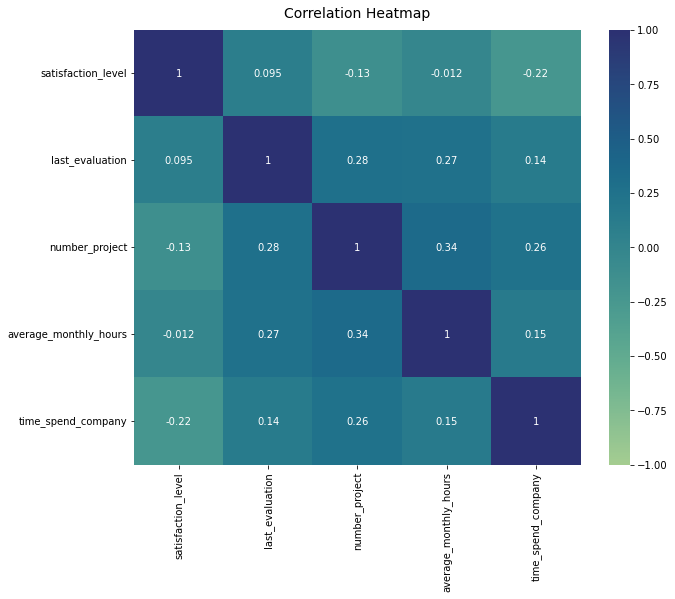

In [47]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_log_reg[['satisfaction_level', 
                                  'last_evaluation', 'number_project', 
                                  'average_monthly_hours', 'time_spend_company']].corr(), 
                                  vmin=-1, vmax=1, annot=True, cmap = 'crest')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

satisfaction level is negatively correlated with tenure, number of projects, and average monthly hours, in order from most negatively correlated to least.

In [48]:
#define the variable to predict
y = df_log_reg['left']

In [49]:
#define predictor variables
X = df_log_reg[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium' , 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]


In [50]:
#create test and training sets, test size, and random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#fit the model to abbreviated logistic classification model object
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [52]:
#create y predictions
y_pred = log_clf.predict(X_test)

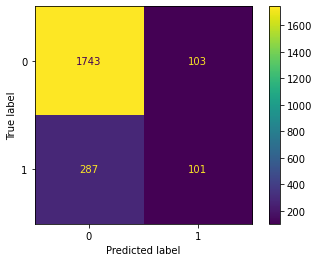

In [53]:
#plot confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm,
                                 display_labels = log_clf.classes_)
log_disp.plot(values_format = '.5g')
plt.show()

In [54]:
#show scoring
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.50      0.26      0.34       388

                 accuracy                           0.83      2234
                macro avg       0.68      0.60      0.62      2234
             weighted avg       0.80      0.83      0.80      2234



### Logistic Regression Results

This model is not very good at predicting who will leave the company. It results in a precision of 0.50, recall of 0.6, f1 of 0.34.
The model does perform well at predicting who will stay, but there are a lot of false negatives, and this does not perform well enough to fulfill the purpose of this project.

At this point we should use machine learning techniques to see if we can get a more accurate model. A decision tree model, and a random forest model, which uses an ensemble of of decision trees with random predictor variables, may be the best choices for this project.

## Decision Tree, and Random Forest Machine Learning Models

In [55]:
#Create new dataframe without the created monthly hour group column from EDA.
df2 = df1.drop(columns = 'monthly_hour_group')

In [56]:
#one-hot encode all categorical columns
df2 = pd.get_dummies(df2)

In [57]:
#check columns
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [58]:
#define predicted variable
y = df2['left']

In [59]:
#define predictor variables
X = df2.drop('left', axis = 1)

In [60]:
#Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
#Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [61]:
#create decision tree model
tree = DecisionTreeClassifier(random_state = 0)
#define hyperparameters, with a range of possibilities.
cv_params = {'max_depth': [4,6,8,None],
             'min_samples_leaf': [2,5,1],
             'min_samples_split': [2,4,6]
             }

#Create a dictionary of scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [62]:
%%time
#compute time, and fit model
tree1.fit(X_tr, y_tr)

CPU times: user 2.48 s, sys: 0 ns, total: 2.48 s
Wall time: 2.48 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [63]:
#display which hyperparmater values gave the best results
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [64]:
#create a function to produce a table of results
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): name of the model in the output table
        model_object:        a fit GridSearchCV object
        metric (string):     precision, recall, accuracy, f1, auc, rocauc
    Returns a pandas dataframe with metrics for the model 
    with the best mean metric score across all validation folds
    '''
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'accuracy': 'mean_test_accuracy',
                   'f1': 'mean_test_f1'
                  }
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    #create dataframe with results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
    return table
    

In [65]:
#Apply the make_results function to tree1
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970363,0.922167,0.921337,0.921719,0.974007


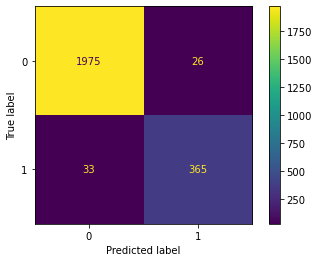

In [66]:
#Generate array of values for confusion matrix
tree_preds = tree1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, tree_preds, labels=tree1.classes_)

#Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree1.classes_)
disp.plot( values_format = '.5g');

The results are very good for the purpose of this project. The bottom half of the confusion matrix is the most important for the goal of this model. However, decision Trees have a tendency to overfit. Trying a random forest might produce different results.

### Random Forest Model

In [67]:
#Create random forest model
rf = RandomForestClassifier(random_state=0)

#Create dictionary of hyperparameters with a range of values to cross validate
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

#Create a dictionary of scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [68]:
%%time
#compute time, fit RF model
rf1.fit(X_tr, y_tr)

CPU times: user 7min 49s, sys: 0 ns, total: 7min 49s
Wall time: 7min 49s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [69]:
#compute best score
rf1.best_score_

0.9795790967836983

In [70]:
#display best hyperparameter values
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [71]:
#Get all results from both models
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.970363   0.922167  0.921337  0.921719  0.974007
              Model       AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.979579   0.943576  0.923021  0.933145  0.978037


The random forest performs slightly better that the decision tree in all metrics, expecially precision. A confusion matrix will show us exact values to compare to make sure the project goals are better satisfied with this model.

In [72]:
#create a function to generate a table of scores
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)
#create the dataframe
    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

In [73]:
# Get the results on validation set for both models
tree1_val_results = get_scores('decision tree1 val', tree1, X_val, y_val)
rf1_val_results = get_scores('random forest1 val', rf1, X_val, y_val)

# Concatenate validation scores into table
all_val_results1 = [tree1_val_results, rf1_val_results]
all_val_results1 = pd.concat(all_val_results1).sort_values(by='AUC', ascending=False)
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.954,0.955,0.917,0.936,0.979
0,decision tree1 val,0.952,0.924,0.920,0.922,0.974


In [74]:
# Get predictions using test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest1 test,0.955,0.961,0.917,0.938,0.98


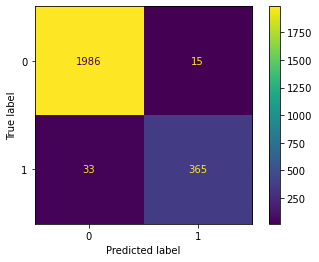

In [75]:
# Generate array of values for confusion matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot( values_format = '.5g');

### Random Forest vs Decision Tree Results

This model performs well for predicting both employees who stayed, and who left. The results in the bottom half of the confusion matrix are the same for the Decision Tree and Random Forest models, but the Random Forest performs better for true negatives (employees who will stay) and false positives (employees who will stay, but the model incorrectly predicted they would leave).

The random forest is the better model, even though the 2 models performed the same for the results we are most concerned with: true positives, and false negatives.

#### Feature Importance

In [76]:
#Create a dataframe of gini importances for each predictor variable, based on the decision tree model
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]

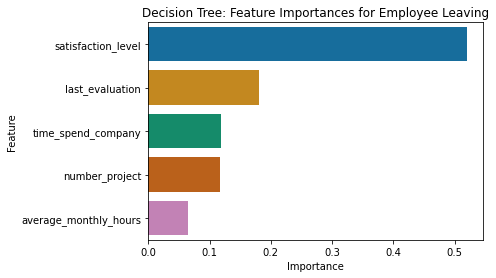

In [77]:
#Bar Plot of feature importances from the Decision Tree model
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h', palette = 'colorblind')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

We also want to see feature importance from the random forest model, even though the models were very similar, and will produce very similar importances.

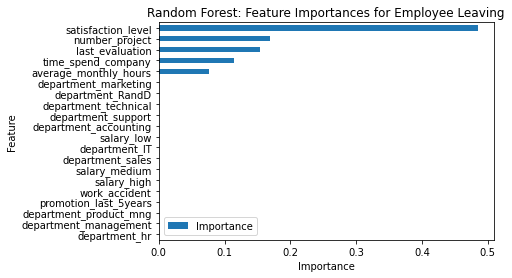

In [78]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of all 20 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -20)[-20:]

# Get column labels of all features 
feat = X.columns[ind]

# Filter `feat_impt`
feat_impt = feat_impt[ind]
#
y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

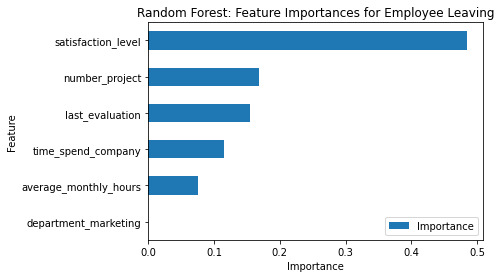

In [79]:
# Get feature importances
feat_impt_top6 = rf1.best_estimator_.feature_importances_

# Get indices of top 6 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -6)[-6:]

# Get column labels of all features 
feat = X.columns[ind]

# Filter `feat_impt`
feat_impt_top6 = feat_impt_top6[ind]
#
y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt_top6})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")
ax1.legend(loc = 'lower right')

plt.show()

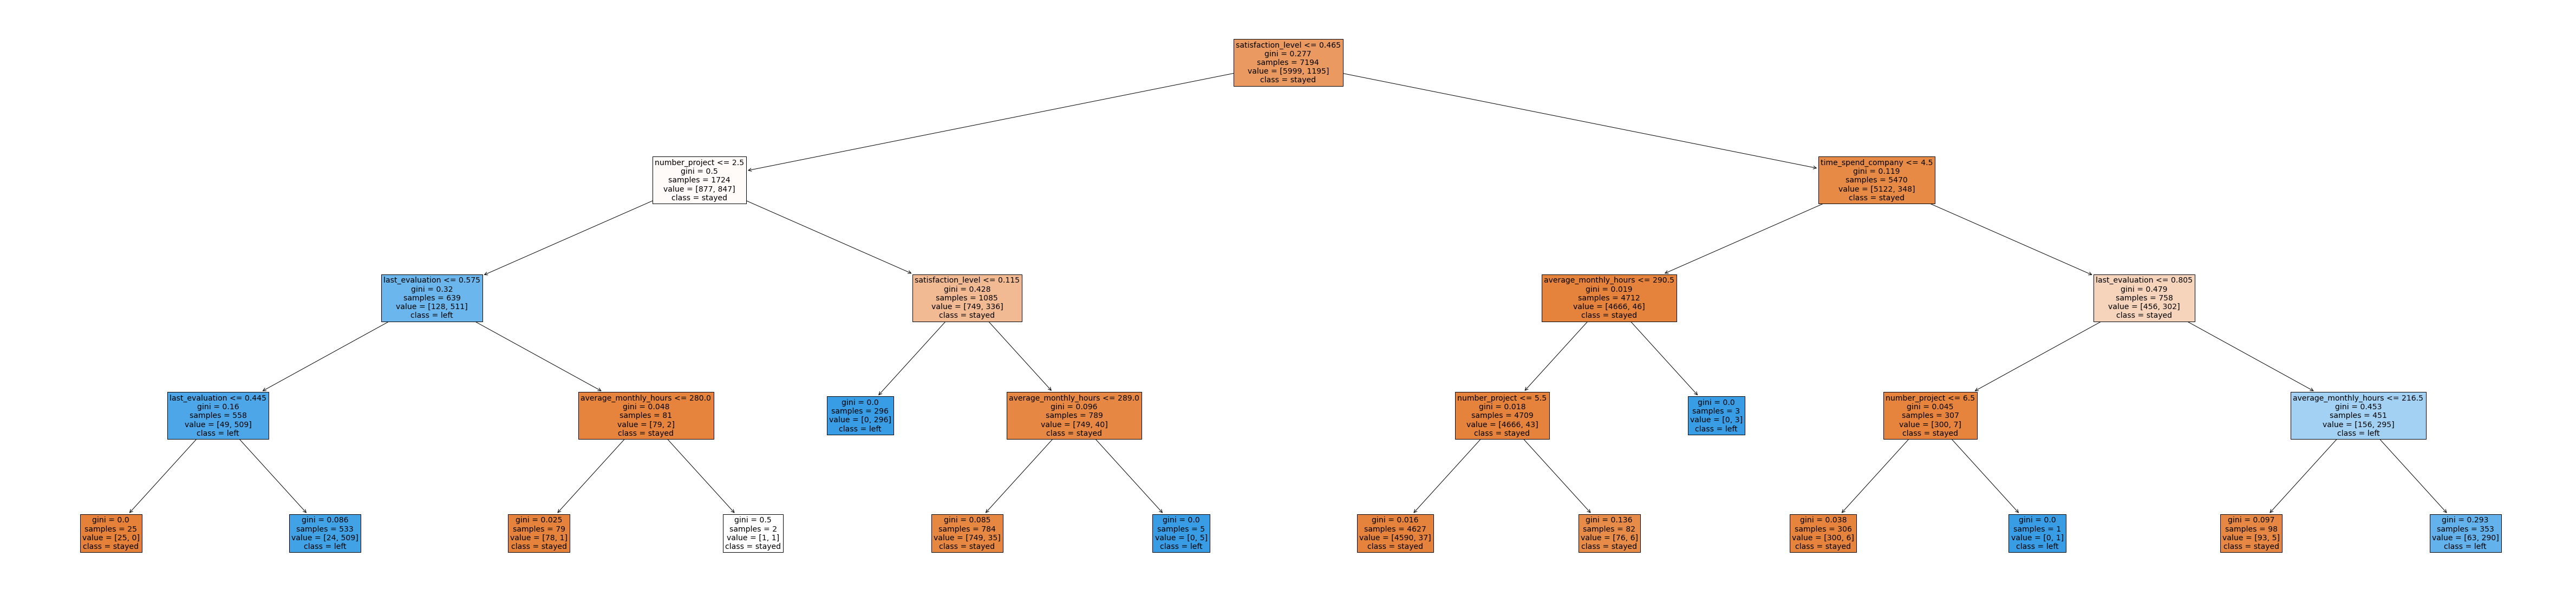

In [80]:
# Plot the decision tree produced by the model
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

## Extreme Gradient Boosting Model

The random forest model performed very well, but it would not hurt to try an XGBoost model to see if that performs even better.

In [81]:
#define XGB from xgboost
xgb = XGBClassifier(random_state = 0)

In [82]:
#hyperparameter tuning for cross validation
cv_params = {'max_depth': [3, 6],
             'min_child_weight': [3, 5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [3, 5, 10],
             'subsample': [0.7],
             'colsample_bytree': [0.7]
            }


In [83]:
#define scoring
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [84]:
#instantiate XGB cross validation using grid search
xgb_cv = GridSearchCV(xgb,
                     cv_params,
                     scoring = scoring,
                     cv = 5,
                     refit = 'f1'
                     )

In [85]:
%%time
#fit and report the machine time for the XGB model
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: user 18.9 s, sys: 0 ns, total: 18.9 s
Wall time: 10.1 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': 

In [86]:
#show XGB best hyperparameters
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 10,
 'subsample': 0.7}

In [87]:
#create y predictions from x test data
y_pred_xgb = xgb_cv.predict(X_test)

In [88]:
#show XGB best score
xgb_cv.best_score_

0.9449645912573779

In [89]:
#Show scoring using test data and predictions
#print the accuracy score
ac_score = metrics.accuracy_score(y_test, y_pred_xgb)
print('accuracy score:', ac_score)
#print precision score
pc_score = metrics.precision_score(y_test, y_pred_xgb)
print('precision score:', pc_score)
#print recall score
rc_score = metrics.recall_score(y_test, y_pred_xgb)
print('recall score:', rc_score)
#print f1 score
f1_score = metrics.f1_score(y_test, y_pred_xgb)
print('f1 score:', f1_score)

accuracy score: 0.9816590245935807
precision score: 0.9836065573770492
recall score: 0.9045226130653267
f1 score: 0.9424083769633507


In [90]:
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.954,0.955,0.917,0.936,0.979
0,decision tree1 val,0.952,0.924,0.920,0.922,0.974


In [91]:
all_val_results1 = all_val_results1.append({'model': 'XGB_CV', 'AUC': 'Null', 'precision': 0.9836, 'recall': 0.9045, 'f1': 0.9424, 'accuracy': 0.981}, ignore_index = True)
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.954,0.9550,0.9170,0.9360,0.979
1,decision tree1 val,0.952,0.9240,0.9200,0.9220,0.974
2,XGB_CV,Null,0.9836,0.9045,0.9424,0.981


The XGB model performs better in 3 of 4 metrics. However, the decision tree is the best model for the purpose of identifying employees who will leave. I will explain why after looking at the confusion matrix. The lower recall score means a lower proportion of positives identified correctly by the model. The confusion matrix should show more false negatives, and fewer true positives.

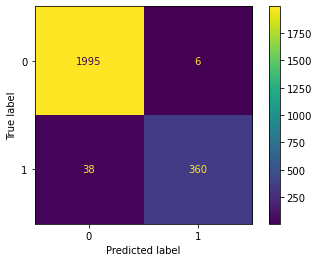

In [92]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb)
# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_,)
# Plot the visual in-line.
disp.plot( values_format = '.5g')


## Why we don't choose the XGB model with best overall scoring

XGBoosting resulted in 5 more false negatives, 5 fewer true positives, 9 more true negatives, 9 fewer false positives. The higher f1, accuracy, and precision score might tempt us to pick the XGB model, but I'll explain why it is not as good as the Random Forest, or even the Decision Tree model for its intended purpose.

True negatives (in yellow) are the model correctly predicting employees who will stay. True positives (in lighter purple) are the model correctly predicting employees who will leave. False negatives (bottom left) are the model incorrectly predicting an employee will stay, when they actually leave. False positives (top right) are the model incorrectly predicting an employee will leave, when they actually stay. Remember that the bottom half of the confusion matrix is the most important section for the purpose of this project.

The goal of this model is to predict employees who will leave, and to overlook as few of them as possible via false negatives. Predicting employees who will stay (true negatives), and false positives are not as important as the other 2 metrics. Because we want true positives to be as high as possible, and false negatives to be as low as possible, this model performs worse than the Random Forest, and the Decision Tree model. We would hope for more true positives, and less false negatives, but we got the opposite. This is why it is so important to interpret the results. Without careful interpretation, we could have chosen a model that has higher scores, but does not perform as well as another model for the intended purpose.

The confusion matrix results confirm our metrics table results.

## 5. Results and Evaluation

In [93]:
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.954,0.9550,0.9170,0.9360,0.979
1,decision tree1 val,0.952,0.9240,0.9200,0.9220,0.974
2,XGB_CV,Null,0.9836,0.9045,0.9424,0.981


### Conclusion, Recommendations, Next Steps

#### Conclusion

The Random Forest Model produces the best results of the 3 models built and tested.

This model has great metrics.
<br>Precision 95.5% - The proportion of positive predictions that were true positives.
<br>Recall    91.7% - The proportion of positives the model identified correctly.
<br>F1        93.6% - A combination of precision and recall.
<br>Accuracy  97.9% - Proportion of correct predictions from the total predictions.

The model predicted 365 true positives, and only 33 false negatives.

The variables that predicted employee departure are as follows, in order of importance:
<br>1. Satisfaction Level
<br>2. Number of Projects
<br>3. Last Evaluation
<br>4. Tenure
<br>5. Average Monthly Hours

#### Recommendations
<br>1. Take satisfaction level surveys more often, and have management follow up with employees who have a satisfaction score lower than 0.5. In our model, this variable is as important as the other 4 variables combined. Satisfaction level should be the number 1 priority in the effort to reduce turnover.

<br>2. Cap the number of projects people work on at 4 or 5. This may mean redistributing employees, and training / promoting employees who work on few projects.

<br>3. Have management follow up with employees who have an evaluation score of less than 0.6. It may be valuable to do more frequent evaluations.

<br>4. Have management reach out to all employees who have been with the company for 3-6 years. This range has the greatest proportion of turnover according to this dataset.

<br>5. Create systems that encourage employees to not work more than about 220 hours per month, or 55 hours per week. According to this data, employees above 224 hours per month, and employees between 125-174 hours per month had the greatest proportion of turnover. Employees with less than 125 hours per month had very low turnover. The group between 125-174 hours per month having higher turnover than 175-224 hours per month is interesting. This group could benefit from further investigation.

<br>6. Although promotion in the last 5 years was not predictive in our model, employees who worked high average monthly hours with no promotion in the last 5 years were are very likely to leave. Management should follow up with employees who have high average monthly hours, and no promotion within the last 5 years.

#### Next Steps
More data could help improve this model further. Better balance in the prediction variable could have an impact on the model performance.

A K-means model to analyze clusters of data could produce valuable insights.